# The purpose is to show the k93 standards

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['agn','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic',\
               'k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_nostar,dir_submodels[8],'standards')

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

In [13]:
fits_files

['sun.fits',
 'sun_castelli.fits',
 'sun_kurucz93.fits',
 'sun_reference.fits',
 'vega.fits',
 'vega_c95.fits',
 'vega_k93.fits',
 'vega_reference.fits']

In [14]:
#fits_files.remove('jspectype.fits')

## Find the star-names in the files

In [15]:
obj_headers = []
obj_files = []
for filename in fits_files:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        obj_headers.append(hdr)
        obj_files.append(filename)

In [16]:
obj_headers[0]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
ORIGIN  = 'STScI-STSDAS/TABLES' / Tables version 1999-03-22                     
FILENAME= 'sun.fits'           / name of file                                   
HISTORY   Kurucz model atmospheres (1993)                                       
TEFF    =                 5777                                                  
LOG_G   =         4.437700E+

In [17]:
#obj_names = []
#index=0
#for hdr in obj_headers: 
#        obj_name=obj_headers[index]['TARGETID']
#        obj_names.append(obj_name)
#        index+=1

In [18]:
#obj_names

In [19]:
fits_files[:5]

['sun.fits',
 'sun_castelli.fits',
 'sun_kurucz93.fits',
 'sun_reference.fits',
 'vega.fits']

In [20]:
obj_names2 = []
index=0
for thefile in fits_files:
    #thenames=re.findall('^bk_([a-z][0-9]+).fits$',thefile)
    thenames=re.findall('^(.*).fits$',thefile) 
    if(len(thenames)>0):
        obj_names2.append(thenames[0])
    else:
        print 'bad file ',thefile
    index+=1

In [21]:
print obj_names2

['sun', 'sun_castelli', 'sun_kurucz93', 'sun_reference', 'vega', 'vega_c95', 'vega_k93', 'vega_reference']


In [22]:
obj_names=obj_names2

In [23]:
print obj_files

['sun.fits', 'sun_castelli.fits', 'sun_kurucz93.fits', 'sun_reference.fits', 'vega.fits', 'vega_c95.fits', 'vega_k93.fits', 'vega_reference.fits']


In [24]:
objames_and_objfiles = zip(obj_names, obj_files)

## Make a dictionary of filenames

In [25]:
OBJDict= {}
for obj,thefile in objames_and_objfiles:
    print obj,': '
    OBJDict[obj]=thefile
    print OBJDict[obj] 

sun : 
sun.fits
sun_castelli : 
sun_castelli.fits
sun_kurucz93 : 
sun_kurucz93.fits
sun_reference : 
sun_reference.fits
vega : 
vega.fits
vega_c95 : 
vega_c95.fits
vega_k93 : 
vega_k93.fits
vega_reference : 
vega_reference.fits


## Plot the SED

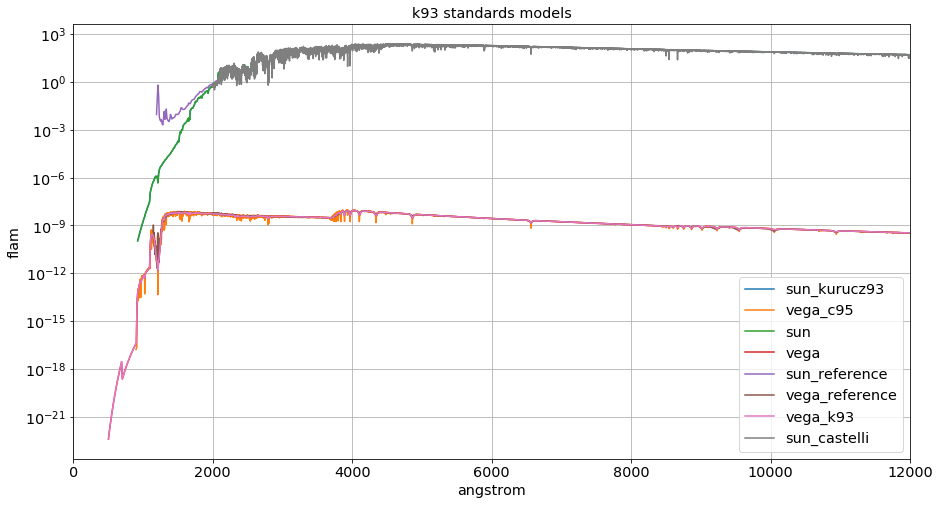

In [26]:
for keyobj in OBJDict:
    the_file=OBJDict[keyobj]
        
    selected_file=the_file
    selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
    sed=S.FileSpectrum(selected_fullfile)
        
    plt.semilogy(sed.wave,sed.flux,label=keyobj)
    plt.xlim(0, 12000)
    #plt.ylim(1e-23, 1e-6)
    plt.xlabel(sed.waveunits)
    plt.ylabel(sed.fluxunits)
    plt.grid(True)
    plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("k93 standards models")
    plt.savefig("k93-standards.png")